# **Import Library**

In [1]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=dc166a2b1f6e9ea6f1707ea8655d502a1db0da42267ebb08a6288b007df3b056
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Building Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.applications import ResNet50V2

# Data Processing
import cv2
import imutils
import shutil
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

# Model Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# **Data Preparartion**

In [4]:
# Function for importing data           
def get_data_labels(directory, shuffle=True, random_state=0):
    """
    Function used for going into the main training directory
    whose directory has sub-class-types.
    """
    from sklearn.utils import shuffle

    # Lists to store data and labels
    data_path = []
    data_labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)

        # Avoid MacOS storing path
        if not os.path.isdir(label_dir):
            continue

        # Going into each folder and getting image path
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_labels.append(label)
            
    if shuffle:
        data_path, data_labels = shuffle(data_path, data_labels, random_state=random_state)
            
    return data_path, data_labels

In [5]:
# Setting up file paths for training and testing
USER_PATH = r"/kaggle/input/breast-cancer-split/Splitting Dataset"
train_dir = USER_PATH + r'/train/'
val_dir = USER_PATH + r'/val/'
test_dir = USER_PATH + r'/test/'

# Getting data using above function
train_paths, train_labels = get_data_labels(train_dir)
val_paths, val_labels = get_data_labels(val_dir)
test_paths, test_labels = get_data_labels(test_dir)

# Printing traing and testing sample sizes
print('Training')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print('\nValidation')
print(f'Number of Paths: {len(val_paths)}')
print(f'Number of Labels: {len(val_labels)}')
print('\nTesting')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')

Training
Number of Paths: 630
Number of Labels: 630

Validation
Number of Paths: 71
Number of Labels: 71

Testing
Number of Paths: 79
Number of Labels: 79


# **Data Visualization**

Training Counts
{'cancer': 523, 'normal': 107}

Validation Counts
{'cancer': 59, 'normal': 12}

Testing Counts
{'cancer': 65, 'normal': 14}


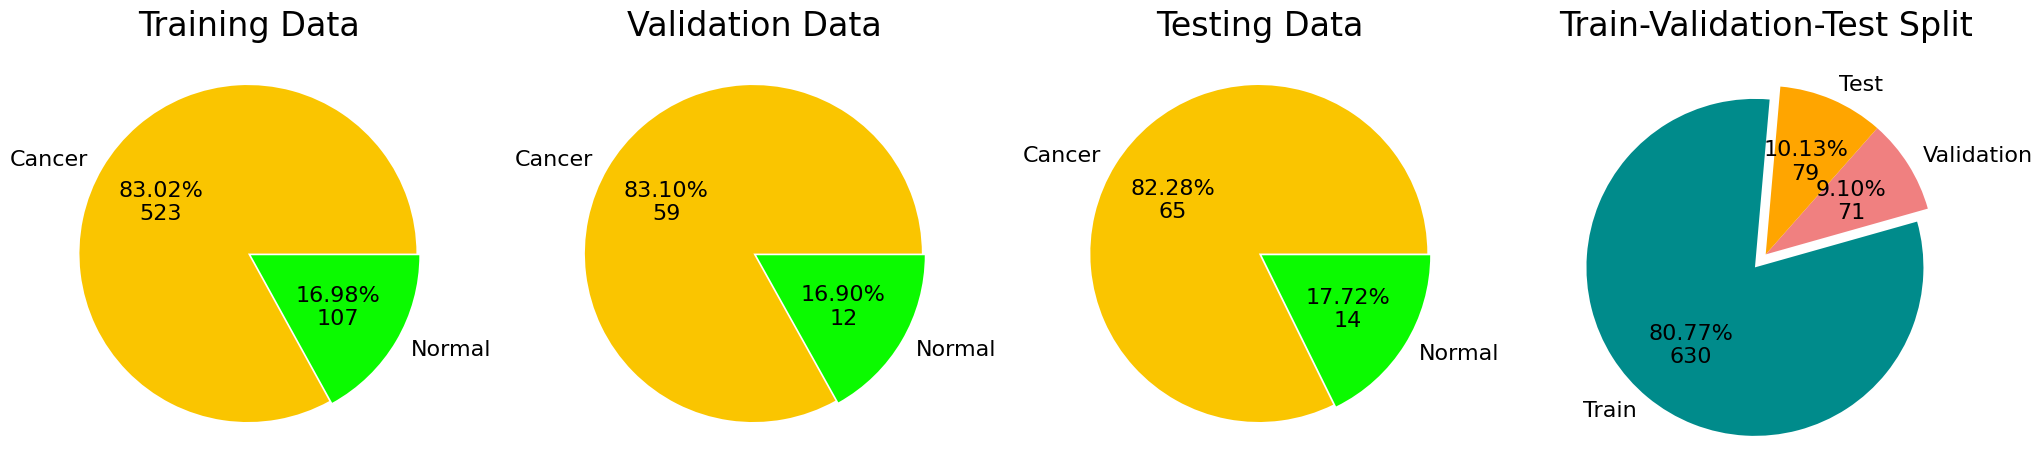

In [6]:
# Data Classifications
CLASS_TYPES = ['cancer', 'normal']
N_TYPES = len(CLASS_TYPES)

_, ax = plt.subplots(ncols=4, figsize=(25, 14))

# Plotting training data types
class_counts = [len([x for x in train_labels if x == label]) for label in CLASS_TYPES]
print('Training Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[0].set_title('Training Data', fontsize=24)
ax[0].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for _ in range(N_TYPES)),
    textprops={'fontsize': 16}
)

# Plotting validation data types
class_counts = [len([x for x in val_labels if x == label]) for label in CLASS_TYPES]
print('\nValidation Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[1].set_title('Validation Data', fontsize=24)
ax[1].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for _ in range(N_TYPES)),
    textprops={'fontsize': 16}
)

# Plotting testing data types
class_counts = [len([x for x in test_labels if x == label]) for label in CLASS_TYPES]
print('\nTesting Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[2].set_title('Testing Data', fontsize=24)
ax[2].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for _ in range(N_TYPES)),  # Explode the slices slightly for better visualization
    textprops={'fontsize': 16}  # Set the font size for the text on the pie chart
)

# Plotting distribution of train, validation, and test split
ax[3].set_title('Train-Validation-Test Split', fontsize=24)
ax[3].pie(
    [len(train_labels), len(val_labels), len(test_labels)],
    labels=['Train','Validation','Test'],
    colors=['darkcyan', 'lightcoral', 'orange'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum([len(train_labels), len(val_labels), len(test_labels)]) / 100),
    explode=(0.1, 0, 0),  # Corrected explode parameter
    startangle=85,
    textprops={'fontsize': 16}
)
plt.show()

In [7]:
# Function to display a list of images based on the given index
def show_images(paths, label_paths, index_list=range(10), im_size=150, figsize=(12, 8), save=False):
    """
    Show images from a given path based on the inputted
    list indices related to the desired images one wishes
    to see.
    """
    
    num_images = len(index_list)
    num_rows = (num_images + 3) // 4
    
    _, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=figsize)
    ax = ax.flatten()

    for i, index in enumerate(index_list):
        if i >= num_images:
            break
        
        image = load_img(paths[index], target_size=(im_size, im_size))
        ax[i].imshow(image)
        ax[i].set_title(f'{index}: {label_paths[index]}')
        ax[i].axis('off')

    plt.tight_layout()
    
    if save:
        plt.savefig('show_image.pdf')
    else:
        plt.show()

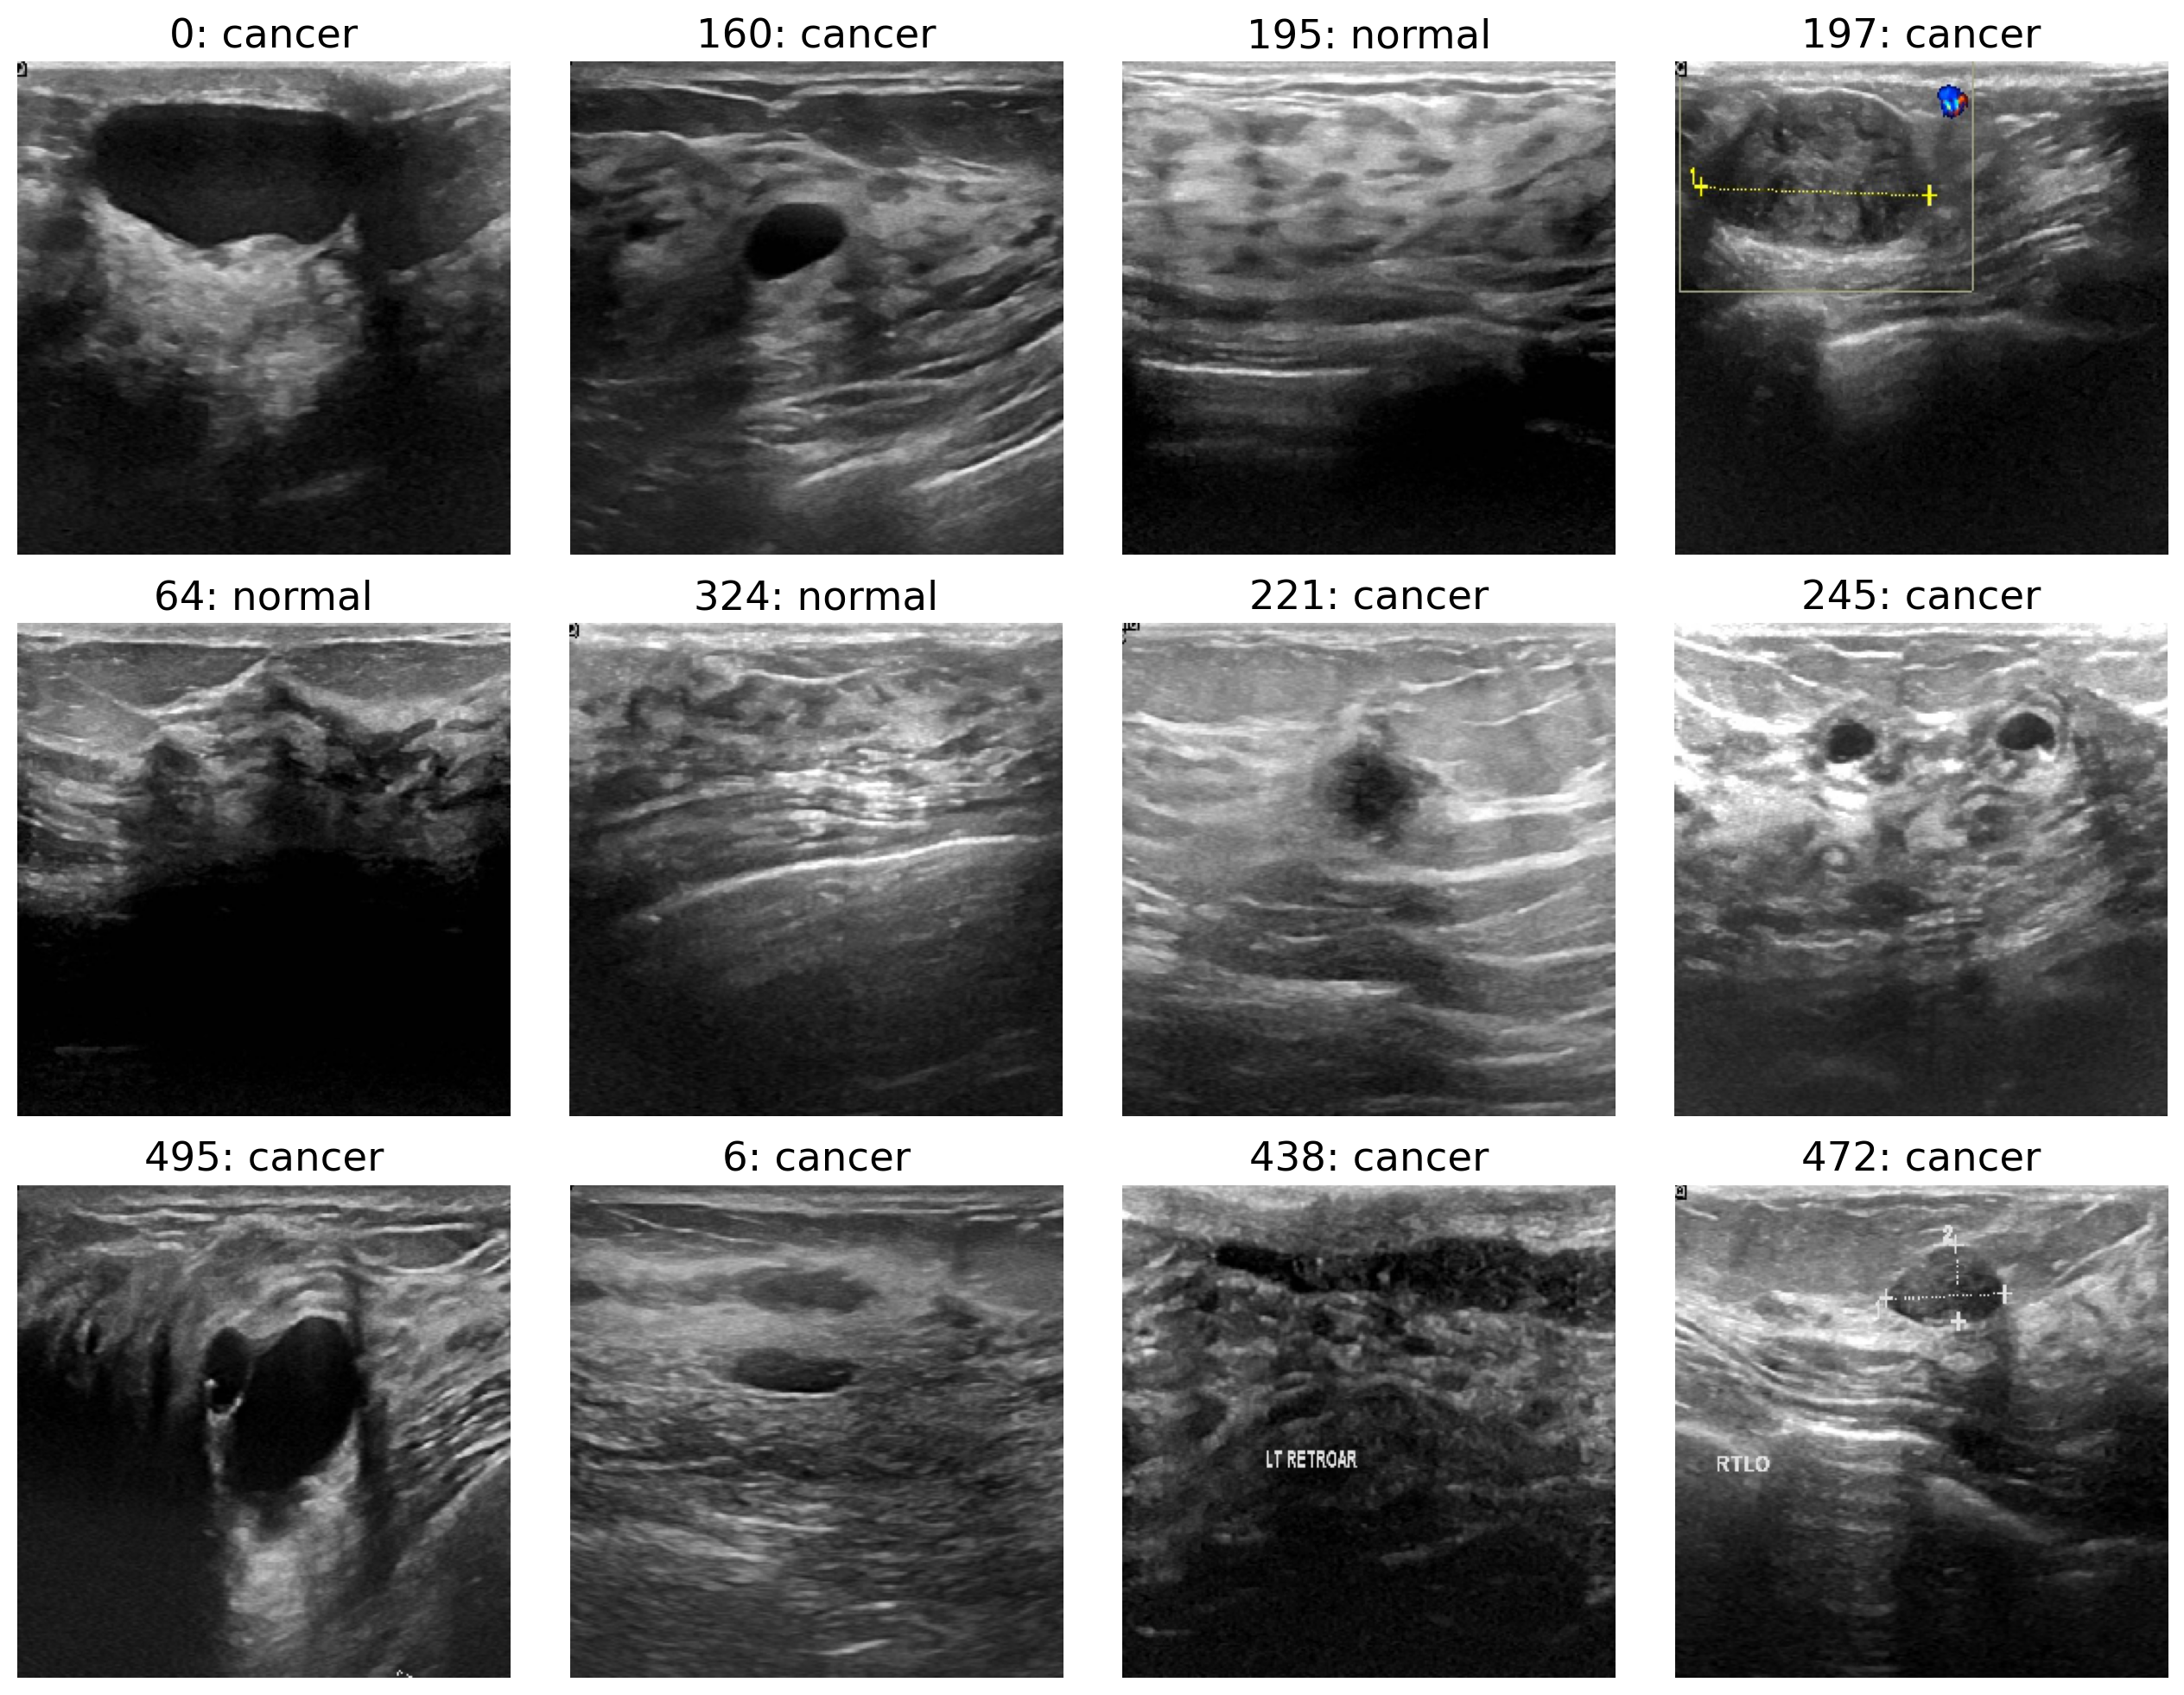

In [8]:
# Global variables
SAVE = False
SEED = 111

# Setting seed for consistent results
tf.keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Data Visualization updates
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams.update({'font.size': 14})

# Four different data classification images, from three different angles (images are independent)
show_images(train_paths, 
            train_labels, 
            index_list=[0, 160, 195, 197,
                        64, 324, 221, 245,
                        495, 6, 438, 472], 
            im_size=256, 
            figsize=(13,10),
            save=SAVE)

# **Data Augmentation**

In [9]:
# Image Size
image_size = (640, 640)

# Training batch size
batch_size = 128

In [10]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")

# applying the generator to training data with constant seed
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

# Data augmentation for validation (you can customize this based on your needs)
val_datagen = ImageDataGenerator(rescale=1./255)

# Applying the generator to validation data with a constant seed
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                class_mode="categorical")

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False)

Found 630 images belonging to 2 classes.
Found 71 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [11]:
# Accessing class indices for training data generator
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())

# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)

Categorical types for the training data:
{'cancer': 0, 'normal': 1}


# **Model Training**

In [12]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)

# Training epochs
epochs = 30

# Steps per epoch
steps_per_epoch = 4

# Validation steps
validation_steps = 4

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Image shape: (640, 640, 3)
Epochs: 30
Batch size: 128
Steps Per Epoch: 4
Validation steps: 4


In [13]:
# –––––––––––––––––––––––––––––––––––––– #
# Output Images and Labels Visualization #
# –––––––––––––––––––––––––––––––––––––– #
def plot_sample_predictions(model, test_generator, categories, test_dir, num_samples=9, figsize=(12, 8)):
    """
    Nice display of prediction samples to see CNN predictions
    for classification.
    """
    # Make predictions on the test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Randomly sample test images
    test_images = np.array(test_generator.filepaths)
    sample_indices = np.random.choice(len(test_images), size=num_samples, replace=False)
    sample_images = test_images[sample_indices]
    sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
    sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

    # Plot sample images with their predicted and true labels
    plt.figure(figsize=figsize)
    
    # Loop over samples
    for i, image_path in enumerate(sample_images):
        # Form subplot and plot
        plt.subplot(3, 3, i + 1)
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis("off")
        
        # Set axis label color depending on correct prediction or not
        prediction_color = 'green' if sample_predictions[i] == sample_true_labels[i] else 'red'
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color=prediction_color)
        
    plt.tight_layout()
    plt.show()
    
# –––––––––––––––––––––––––––––––––––––– #
#            Confusion matrix            #
# –––––––––––––––––––––––––––––––––––––– #
def CM(CNN_model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = CNN_model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    
    return confusion_matrix_array

# –––––––––––––––––––––––––––––––––––––– #
#             Metric Analysis            #
# –––––––––––––––––––––––––––––––––––––– #
def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    specificity = np.diag(confusion_matrix) / (np.diag(confusion_matrix) + np.sum(confusion_matrix, axis=1) - np.diag(confusion_matrix))
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"Specificity: {specificity[i]:.3f}\n")
        
    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

# **Model Structure**

In [14]:
# Pretrained Model For Transfer Learning
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=image_shape)

for layer in base_model.layers:
    layer.trainable = False

# Define the model architecture with best params
model = Sequential()
model.add(base_model)  # Add the pretrained model

# Flatten and add a densely connected layer
model.add(Flatten())

# Full connect layers
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(N_TYPES, activation="sigmoid"))

model.summary()

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ ?                      │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [15]:
# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=True)

# Training the model
best_model = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr])

Epoch 1/30


I0000 00:00:1731603276.082649     135 service.cc:145] XLA service 0x7948b40093d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731603276.082709     135 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-11-14 16:54:41.801330: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[128,64,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,3,640,640]{3,2,1,0}, f32[64,3,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7 stride=2x2 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-14 16:54:42.718045: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.916787168s
Tr

1/4 ━━━━━━━━━━━━━━━━━━━━ 7:06 142s/step - accuracy: 0.1719 - loss: 1.6149

2024-11-14 16:55:37.888421: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[118,64,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[118,3,640,640]{3,2,1,0}, f32[64,3,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7 stride=2x2 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-14 16:55:38.626510: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.738197158s
Trying algorithm eng0{} for conv (f32[118,64,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[118,3,640,640]{3,2,1,0}, f32[64,3,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7 stride=2x2 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"oper

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.4634 - loss: 11.1234 

2024-11-14 16:56:32.782750: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[71,64,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[71,3,640,640]{3,2,1,0}, f32[64,3,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7 stride=2x2 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-14 16:56:32.828972: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.046407758s
Trying algorithm eng0{} for conv (f32[71,64,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[71,3,640,640]{3,2,1,0}, f32[64,3,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7 stride=2x2 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operatio

4/4 ━━━━━━━━━━━━━━━━━━━━ 229s 29s/step - accuracy: 0.4871 - loss: 11.5298 - val_accuracy: 0.8310 - val_loss: 48.4322 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.7969 - loss: 52.8861 - val_accuracy: 0.8310 - val_loss: 20.7591 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8389 - loss: 26.1202 - val_accuracy: 0.8310 - val_loss: 29.8786 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 635ms/step - accuracy: 0.8125 - loss: 32.7972 - val_accuracy: 0.8310 - val_loss: 29.9024 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8125 - loss: 28.1283 - val_accuracy: 0.8732 - val_loss: 21.3887 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step - accuracy: 0.8906 - loss: 13.0967 - val_accuracy: 0.8732 - val_loss: 21.5302 - learning_rate: 0.0010
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9018 - loss: 8.3115 - val_accuracy: 0.887

# **Model Evaluation**

In [16]:
# Evaluating the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples//batch_size)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

2024-11-14 17:15:48.592111: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[79,64,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[79,3,640,640]{3,2,1,0}, f32[64,3,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7 stride=2x2 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-14 17:15:48.756021: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.164103745s
Trying algorithm eng0{} for conv (f32[79,64,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[79,3,640,640]{3,2,1,0}, f32[64,3,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7 stride=2x2 pad=3_3x3_3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operatio

1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step - accuracy: 0.9241 - loss: 3.1527
Test Loss: 3.15271
Test Accuracy: 0.92405


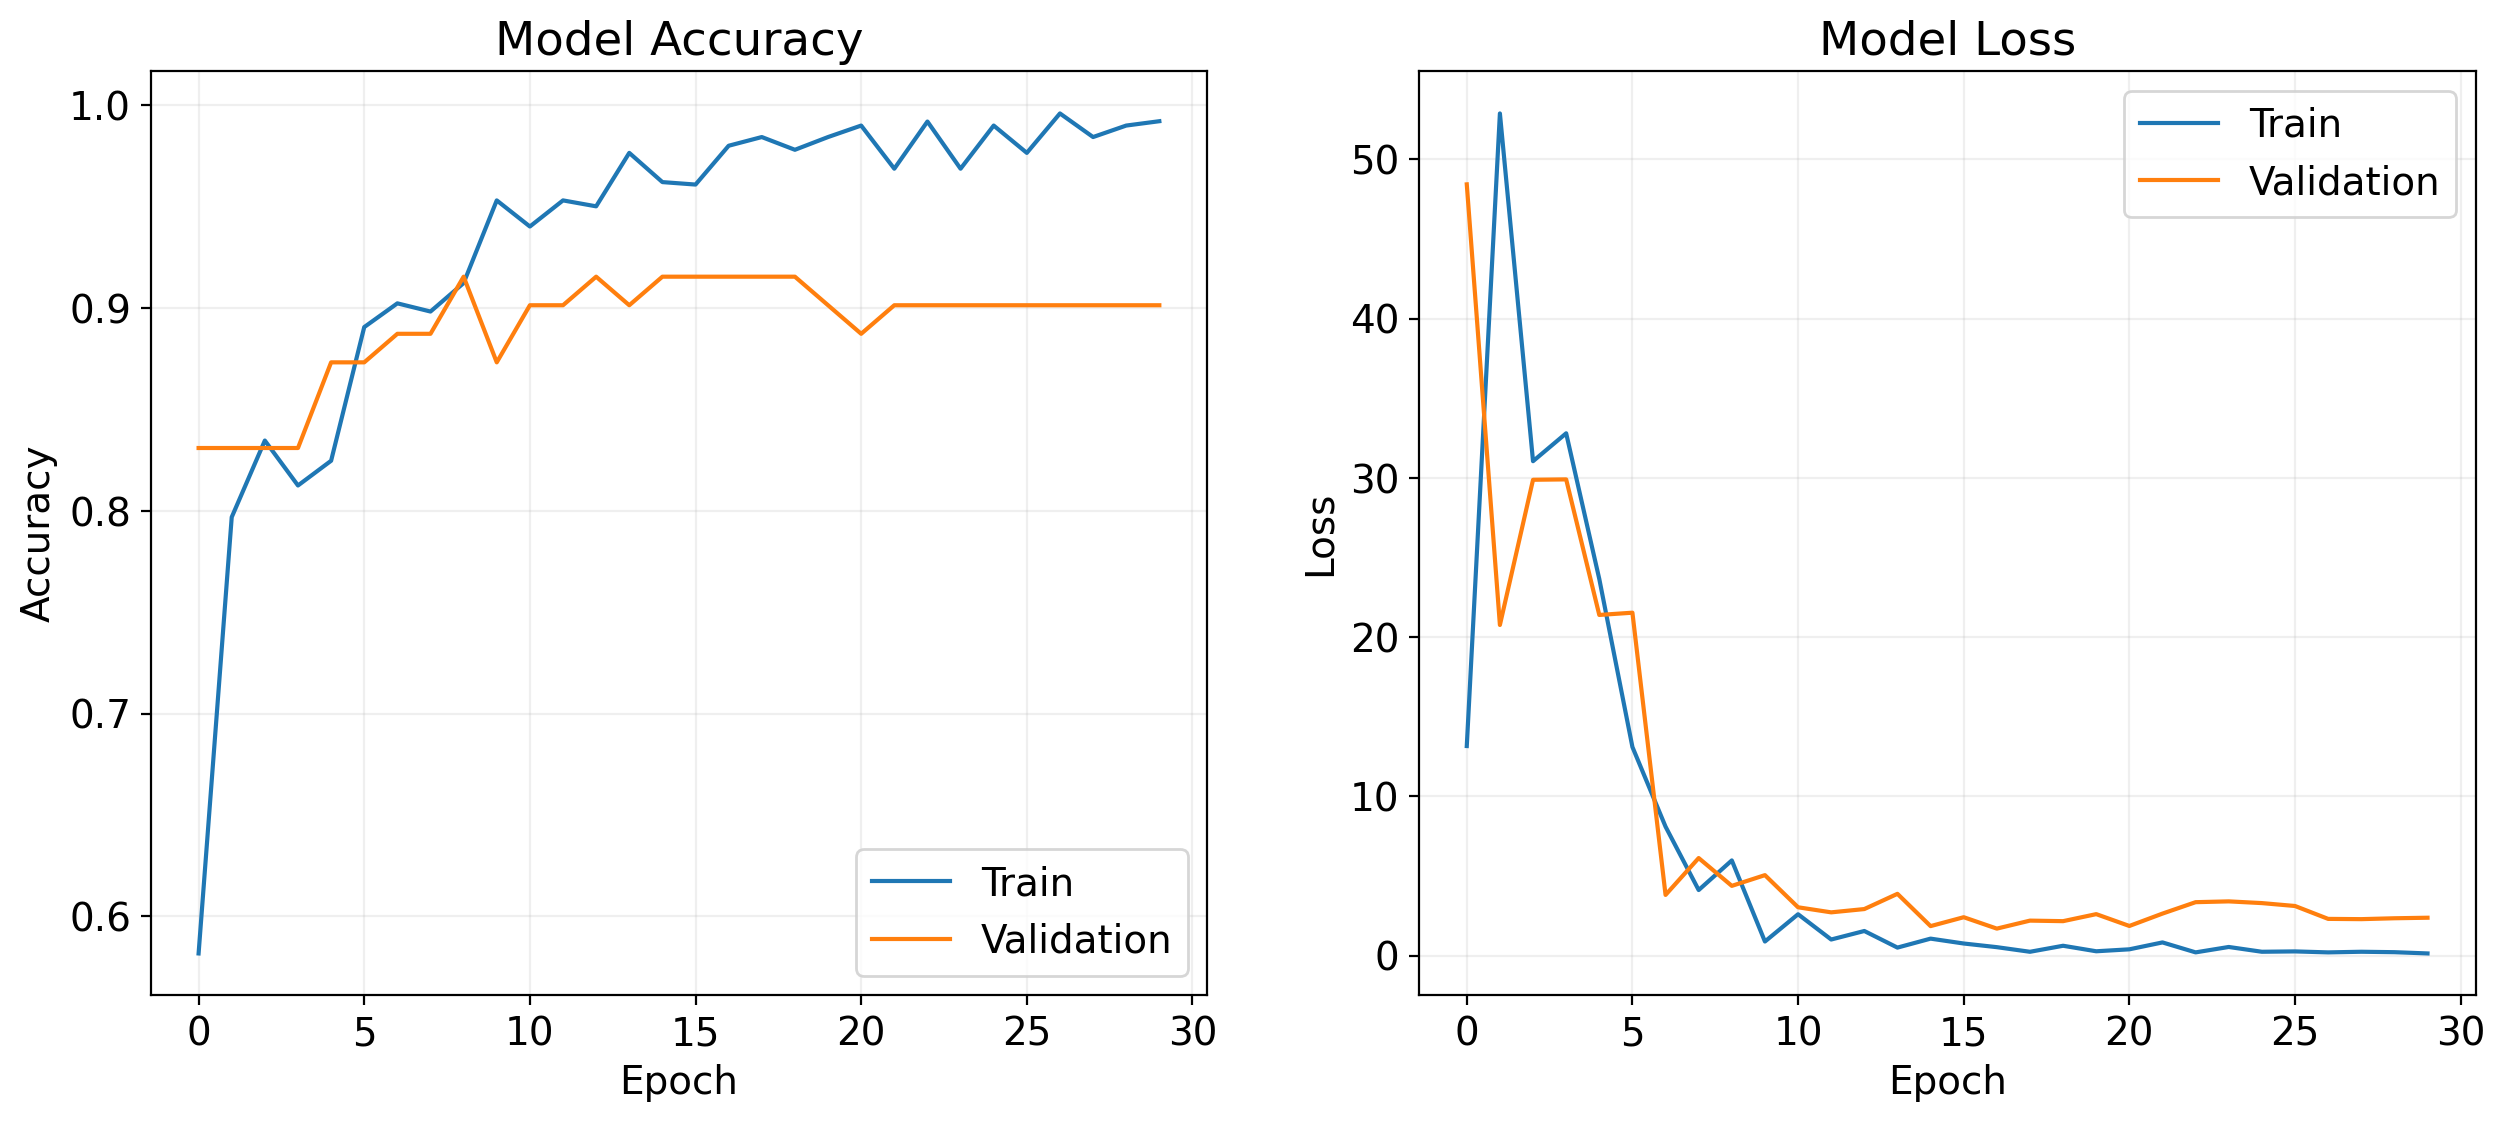

In [17]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the training and validation accuracy over epochs for best_model
ax[0].plot(best_model.history['accuracy'])
ax[0].plot(best_model.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

# Plot the training and validation loss over epochs for best_model
ax[1].plot(best_model.history['loss'])
ax[1].plot(best_model.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


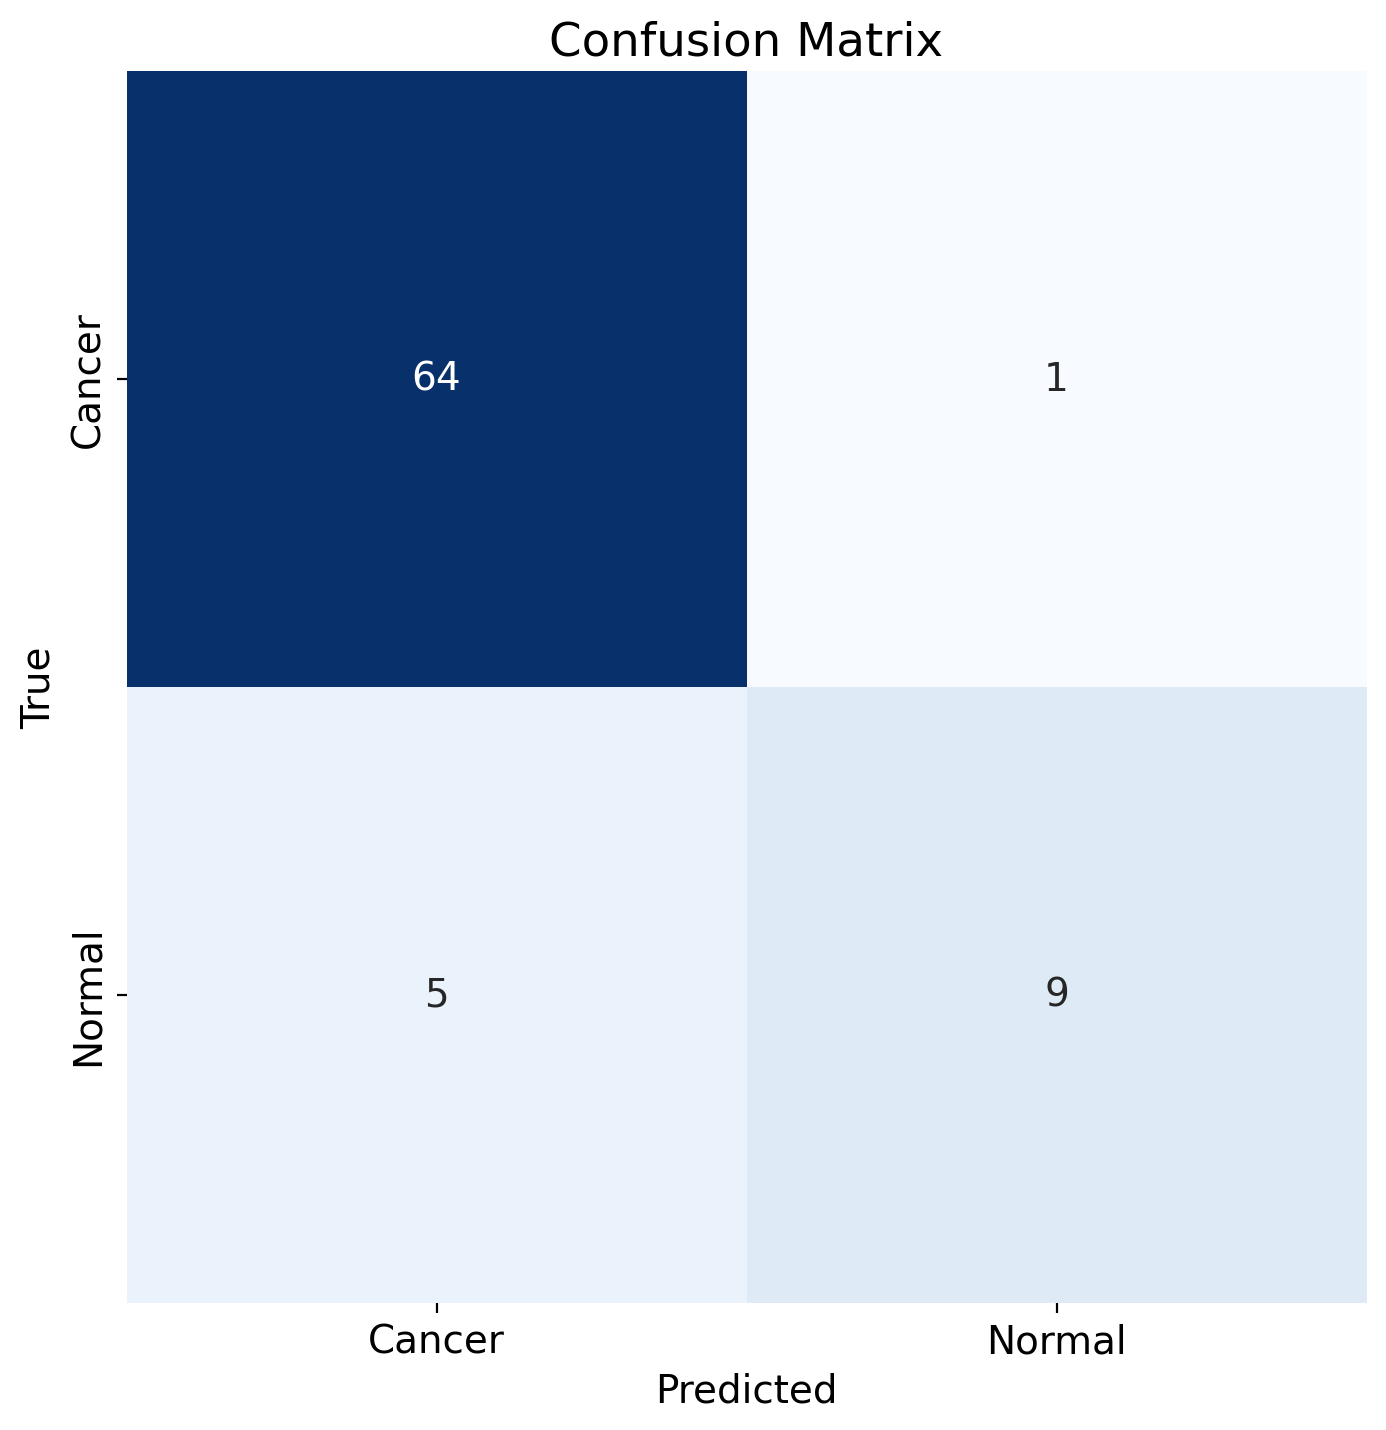

In [18]:
# Plotting confusion matrix for best_model
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=CLASS_TYPES)

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(N_TYPES) + 0.5, 
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


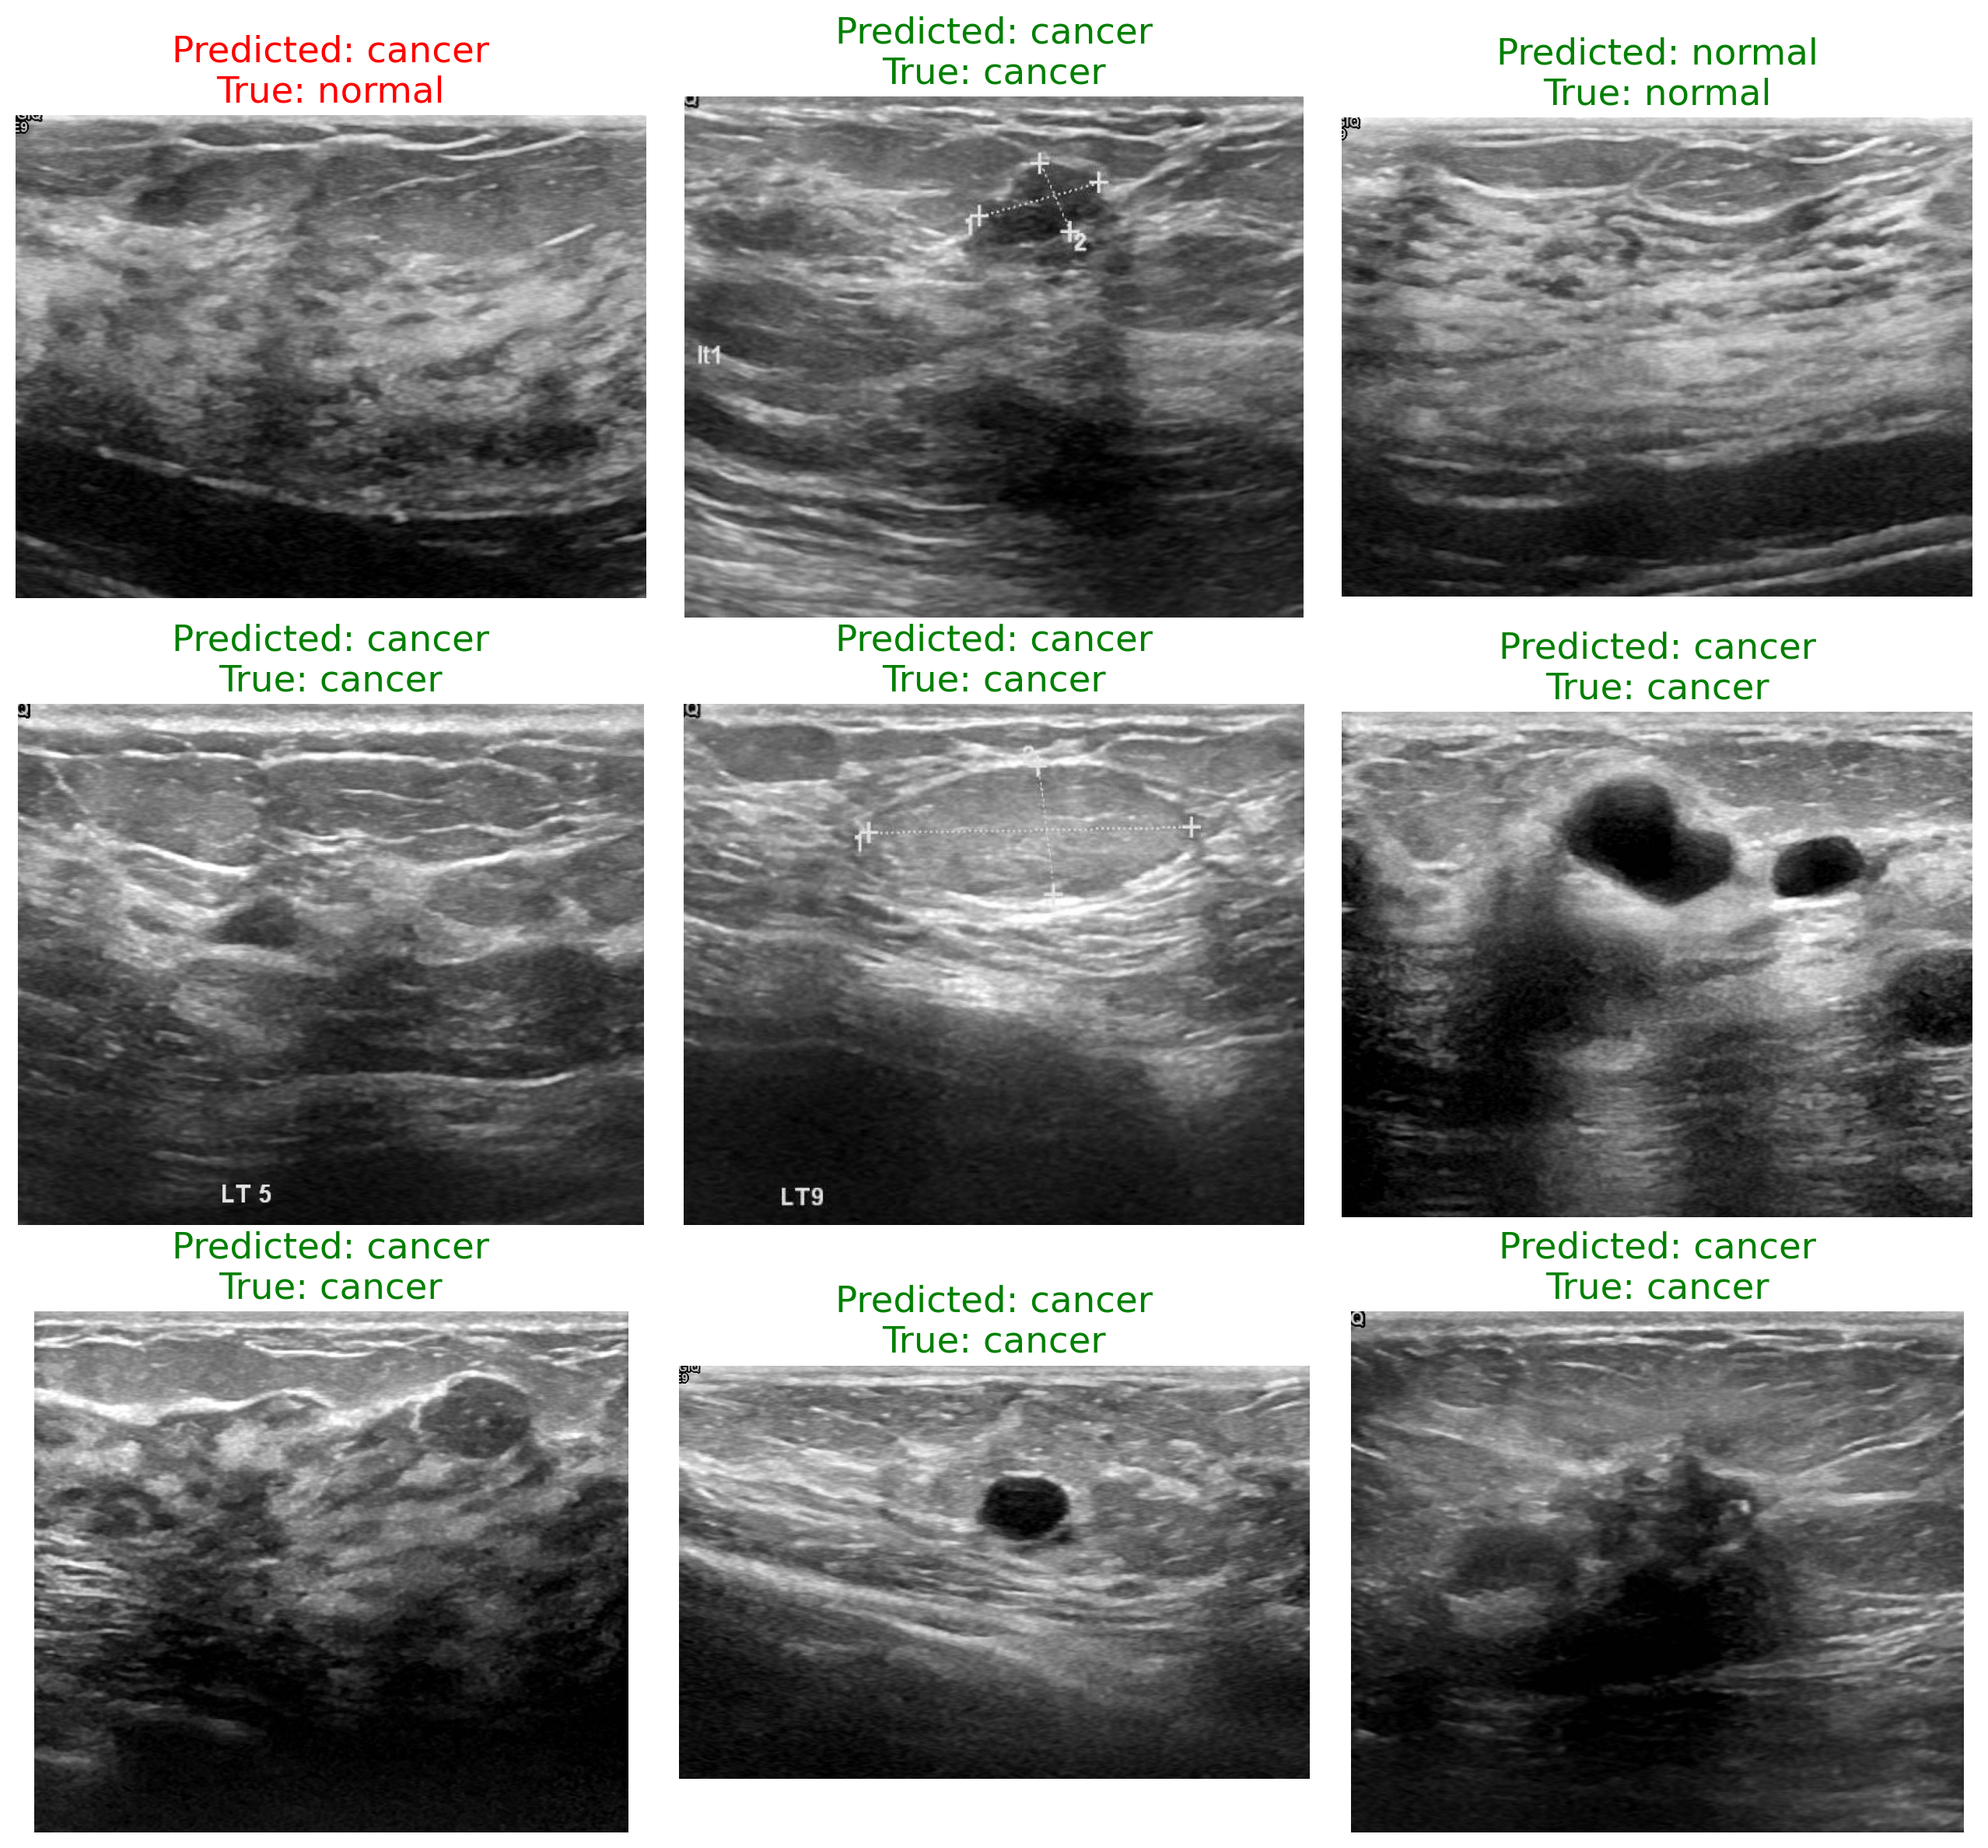

In [19]:
# Using functions in 6.1 for showing results
plot_sample_predictions(model=model, 
                        test_generator=test_generator, 
                        categories=class_indices_train_list,
                        test_dir=test_dir, 
                        num_samples=9,
                        figsize=(13, 12))

In [20]:
# Save the trained model to a file
model.save('best_model.h5')  # You can change the filename as needed

In [21]:
# Generate predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
              precision    recall  f1-score   support

      cancer       0.93      0.98      0.96        65
      normal       0.90      0.64      0.75        14

    accuracy                           0.92        79
   macro avg       0.91      0.81      0.85        79
weighted avg       0.92      0.92      0.92        79

